In [1]:
# Import libraries used
from os import path
import glob
import re

import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
# Load LISST CSV column names from json containing column headers
headers = pd.read_json("./inst_headers/lisst_hdr.json", typ='series', orient='records')
csvhdr = headers.iloc[0]
# aschdr = headers.iloc[1] # CTD cast data headers for .asc files

In [3]:
# Define functions
def load_live_data(testname, csvhdr, testnum=1):
    # Define paths to data
    lisst_path = "C:/Users/kylene.cooley/Documents/prtsz_bench_test"
    live_data_path = f"{testname}_livedata_{testnum}.csv"
    # Load LISST data processed with onboard clean water background
    f = path.join(lisst_path, live_data_path)
    lisst_live = pd.read_csv(f, names=csvhdr)
    try: print(lisst_live.head(1)) 
    except: print("No {testname} LISST data")
    return lisst_live

def load_batt_data(testnum, csvhdr):
    # Create dict associating test number with file name
    testfiles = {
        '1b' : 'I1681955.CSV',
        '2b' : 'I1691502.CSV',
        '3b' : 'I1691637.CSV'
    }
    # Define paths to data
    lisst_path = "C:/Users/kylene.cooley/Documents/prtsz_bench_test"
    batt_data_path = testfiles.get(testnum)
    # Load LISST data processed with onboard clean water background
    f = path.join(lisst_path, batt_data_path)
    lisst_batt = pd.read_csv(f, names=csvhdr)
    try: print(lisst_batt.head(1)) 
    except: print(f"No trial {testnum} LISST data")
    return lisst_batt

# Saving this for a later function if I ever need to load reprocessed data:
# # Load LISST data processed with updated clean water background 
    # # Not using following section for bench test data
    # reproc_path = f"Processed_Data_for_QC/20250404_Reprocessed/{re.sub("I", "L", filename_base[0])}*.csv"
    # for f in glob.glob(path.join(lisst_path, reproc_path)):
    #     lisst_reproc = pd.read_csv(f, names=csvhdr)
    # try: print(lisst_reproc.head(1)) 
    # except: print("No reprocessed LISST data")

In [4]:
# Load data from computer-powered tests
trial_1a = load_live_data("darktest", csvhdr)
trial_2a = load_live_data("lighttest", csvhdr)
trial_3a = load_live_data("beadstest", csvhdr)

   volumecon1  volumecon2  volumecon3  volumecon4  volumecon5  volumecon6  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

   volumecon7  volumecon8  volumecon9  volumecon10  ...  rel_humidity  \
0         0.0         0.0         0.0          0.0  ...            31   

   acceler_x  acceler_y  acceler_z  rawpressure1  rawpressure2  ambient_light  \
0       2375       2725       2496             0         22337              3   

   ext_in3  optical_transmission  beam_attenuation  
0    0.011                 1.009            -0.372  

[1 rows x 61 columns]
   volumecon1  volumecon2  volumecon3  volumecon4  volumecon5  volumecon6  \
0         0.0      0.0014      0.0018      0.0026      0.0039      0.0049   

   volumecon7  volumecon8  volumecon9  volumecon10  ...  rel_humidity  \
0      0.0048      0.0049      0.0053       0.0071  ...            32   

   acceler_x  acceler_y  acceler_z  rawpressure1  rawpressure2  ambient_light  \
0       2430       2728

In [5]:
# Load data from battery-powered tests
trial_1b = load_batt_data("1b", csvhdr)
trial_2b = load_batt_data("2b", csvhdr)
trial_3b = load_batt_data("3b", csvhdr)

   volumecon1  volumecon2  volumecon3  volumecon4  volumecon5  volumecon6  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

   volumecon7  volumecon8  volumecon9  volumecon10  ...  rel_humidity  \
0         0.0         0.0         0.0          0.0  ...            32   

   acceler_x  acceler_y  acceler_z  rawpressure1  rawpressure2  ambient_light  \
0       2282       2615       2410             0         22341              3   

   ext_in3  optical_transmission  beam_attenuation  
0    0.012                 1.011            -0.432  

[1 rows x 61 columns]
   volumecon1  volumecon2  volumecon3  volumecon4  volumecon5  volumecon6  \
0         0.0         0.0         0.0      0.0001      0.0005      0.0012   

   volumecon7  volumecon8  volumecon9  volumecon10  ...  rel_humidity  \
0       0.001      0.0013      0.0031       0.0075  ...            31   

   acceler_x  acceler_y  acceler_z  rawpressure1  rawpressure2  ambient_light  \
0       2296       2635

In [6]:
# List column names
trial_1a.columns

Index(['volumecon1', 'volumecon2', 'volumecon3', 'volumecon4', 'volumecon5',
       'volumecon6', 'volumecon7', 'volumecon8', 'volumecon9', 'volumecon10',
       'volumecon11', 'volumecon12', 'volumecon13', 'volumecon14',
       'volumecon15', 'volumecon16', 'volumecon17', 'volumecon18',
       'volumecon19', 'volumecon20', 'volumecon21', 'volumecon22',
       'volumecon23', 'volumecon24', 'volumecon25', 'volumecon26',
       'volumecon27', 'volumecon28', 'volumecon29', 'volumecon30',
       'volumecon31', 'volumecon32', 'volumecon33', 'volumecon34',
       'volumecon35', 'volumecon36', 'laser_transmission', 'supply_voltage',
       'ext_in1', 'laser_ref', 'depth', 'temperature', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'ext_in2', 'mean_diameter',
       'total_volumecon', 'rel_humidity', 'acceler_x', 'acceler_y',
       'acceler_z', 'rawpressure1', 'rawpressure2', 'ambient_light', 'ext_in3',
       'optical_transmission', 'beam_attenuation'],
      dtype='object')

In [60]:
# Define reusable function for next 3 plots (current iteration may be too contrived)
def plot_lisst(param, data_objects, power_supply="all", min_obs=0, max_obs=25):
    fig, ax = plt.subplots(figsize=(7.5,4))
    color_options = ['k', 'k', 'b', 'b', 'g', 'g']
    test_names = ["dark, computer power", "dark, battery power", "bright light, computer power",
                  "bright light, battery power", "6$\mu$m beads, computer power", "6$\mu$m beads, battery power"]
    line_options = ['-','--']
    for idx, df in enumerate(data_objects):
        if (power_supply=="computer") & (idx%2==1):
            continue
        elif (power_supply=="battery") & (idx%2==0):
            continue
        else:
            df[param][min_obs:max_obs].plot(ls=line_options[idx%2], color=color_options[idx], label=test_names[idx])
    plt.title(("June 2025 Bench Testing - " + param.capitalize().replace("_"," ")))
    plt.grid()
    plt.legend()
    return fig, ax

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kylene.cooley\AppData\Local\Temp\ipykernel_25892\265954431.py:6: SyntaxWarning: invalid escape sequence '\m'
  "bright light, battery power", "6$\mu$m beads, computer power", "6$\mu$m beads, battery power"]
C:\Users\kylene.cooley\AppData\Local\Temp\ipykernel_25892\265954431.py:6: SyntaxWarning: invalid escape sequence '\m'
  "bright light, battery power", "6$\mu$m beads, computer power", "6$\mu$m beads, battery power"]


In [27]:
all_lisst_data = [trial_1a, trial_1b, trial_2a, trial_2b, trial_3a, trial_3b]

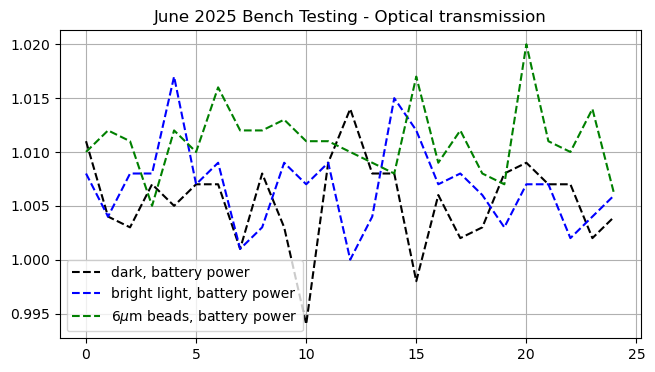

In [17]:
# Plot optical transmission
fig1, ax1 = plot_lisst('optical_transmission', all_lisst_data, power_supply="battery")

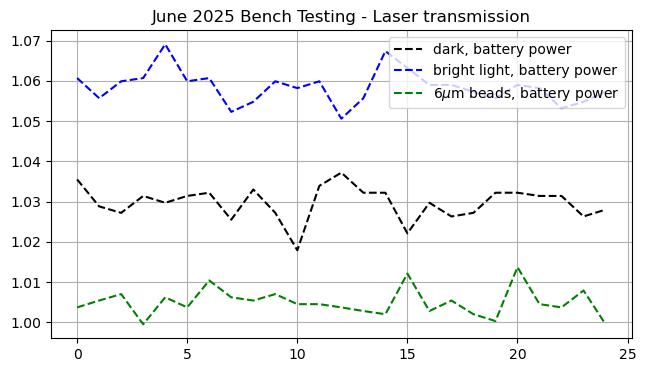

In [18]:
# Plot laser transmission
fig2, ax2 = plot_lisst('laser_transmission', all_lisst_data, power_supply="battery")

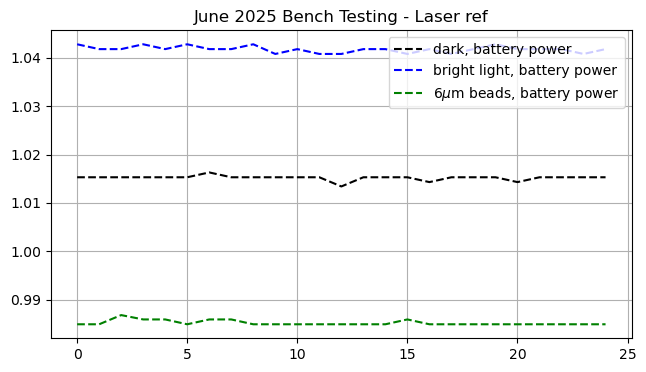

In [19]:
# Plot laser reference
fig3, ax3 = plot_lisst('laser_ref', all_lisst_data, power_supply="battery")

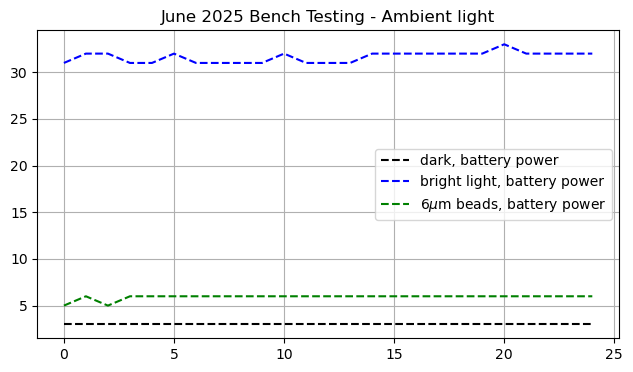

In [20]:
# Plot laser reference
fig4, ax4 = plot_lisst('ambient_light', all_lisst_data, power_supply="battery")

### Changes expected between trials

The noisiness of the optical transmission data makes it difficult to see how optical transmission changes between experiment trials even on short time scales without any smoothing function applied to the data. Based on the samples used, we would expect optical transmission to remain the same between dark and bright incident light tests. Only the beads trial had anything in the water to scatter light from the laser beam in the sample volume and therefore reduce the optical transmission.

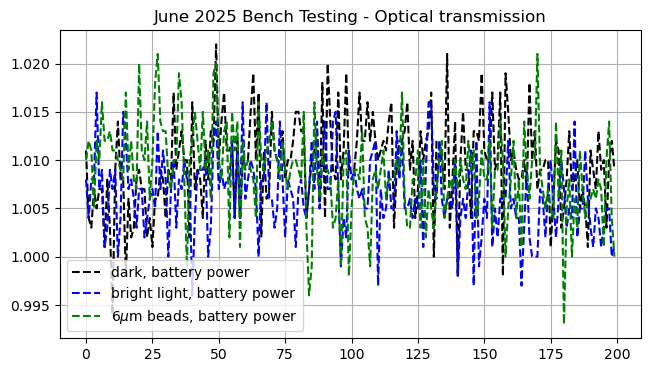

In [28]:
# Plot more optical transmission data to show noisiness
fig1, ax1 = plot_lisst('optical_transmission',
                       all_lisst_data, power_supply="battery",
                       max_obs=200)

In [29]:
# Apply a 30-second median smoothing filter
# 30 seconds = 15 samples
median_smooth_lisst = all_lisst_data.copy()
for idx, df in enumerate(median_smooth_lisst):
    median_smooth_lisst[idx] = df.rolling(15, 
                                          closed="both", 
                                          min_periods=5).median()

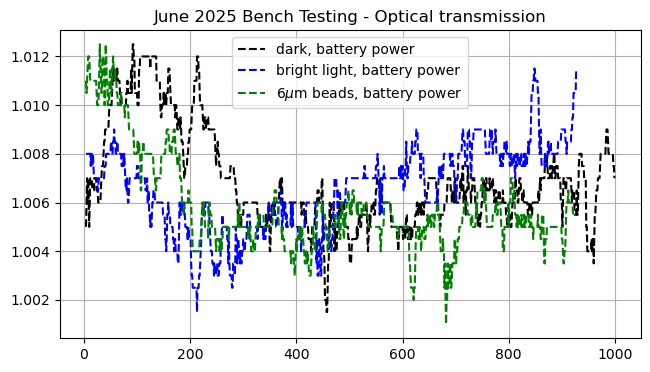

In [33]:
# plot median-smoothed optical transmission
fig2, ax2 = plot_lisst('optical_transmission',
                       median_smooth_lisst, power_supply="battery",
                       max_obs=1000)

The first ~300 observations do not match what we would expect because the bright light trial with clean water yielded lower optical transmission than the trial with a sample containing test beads for much of the test. Higher optical transmission for the test run with clean water in a dark environment seems reasonable.

Next: 
 - use time for x-tick labels instead of observations
 - separately view obs 0-300 and 400-800

In [54]:
# convert datetime from Data Frames into a time elapsed index
reindexed_lisst = all_lisst_data.copy()
for idx, df in enumerate(reindexed_lisst):
    time = pd.to_datetime(df.loc[:, "year":"second"])
    time_elapsed = pd.Series(time-time[0], name="time_elapsed")
    df = df.set_index(time_elapsed)
    reindexed_lisst[idx] = df

In [58]:
# Apply a 30-second median smoothing filter
# 30 seconds = 15 samples
reindexed_median = reindexed_lisst.copy()
for idx, df in enumerate(reindexed_median):
    reindexed_median[idx] = df.rolling(15, closed="both", 
                                       min_periods=5).median()

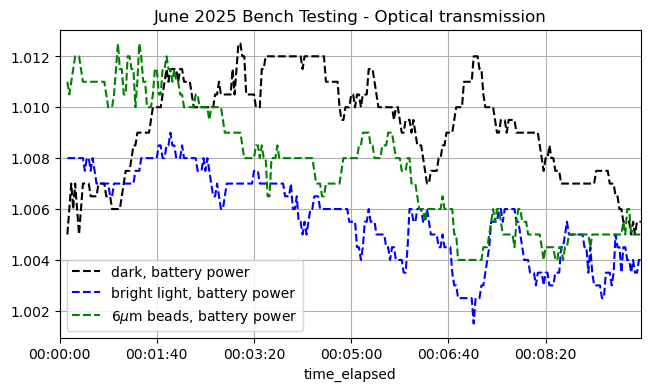

In [62]:
# plot first 300 samples median-smoothed optical transmission
fig3, ax3 = plot_lisst('optical_transmission',
                       reindexed_median, power_supply="battery",
                       max_obs=300)

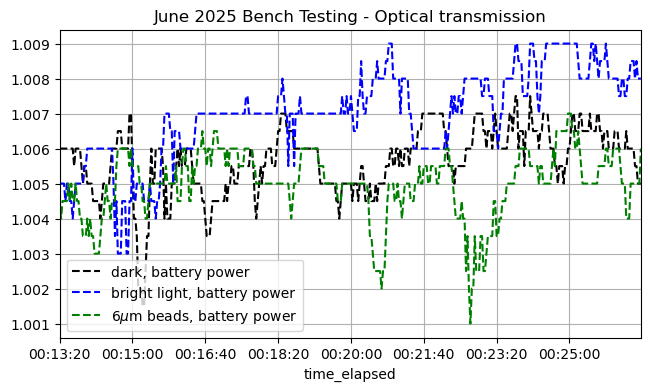

In [63]:
# plot samples 400 to 800 of median-smoothed optical transmission
fig3, ax3 = plot_lisst('optical_transmission',
                       reindexed_median, power_supply="battery",
                       min_obs=400, max_obs=800)

I haven't checked what the resolution for otical transmission is yet, but I have a suspicion that these changes are small enough to be about the same. This is the only thing that makes sense to me if the relative optical transmissions change after the 10-minute mark. It's looking more like the bench test with diluted milk is needed.

### Comparing laser transmission and laser reference values

We would expect laser reference to be higher than laser transmission. Based on the manual's description. I don't know if the processed laser transmission value is corrected in any way from the raw reading.

In [64]:
# compute differences between the laser transmission and laser reference values
laser_diff_1b = trial_1b["laser_ref"] - trial_1b["laser_transmission"]
laser_diff_2b = trial_2b["laser_ref"] - trial_2b["laser_transmission"]
laser_diff_3b = trial_3b["laser_ref"] - trial_3b["laser_transmission"]

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kylene.cooley\AppData\Local\Temp\ipykernel_25892\2563130361.py:5: SyntaxWarning: invalid escape sequence '\m'
  laser_diff_3b[0:25].plot(ls="--", color="g", label="6$\mu$m beads, battery power")


Text(0.5, 0, 'Observation number')

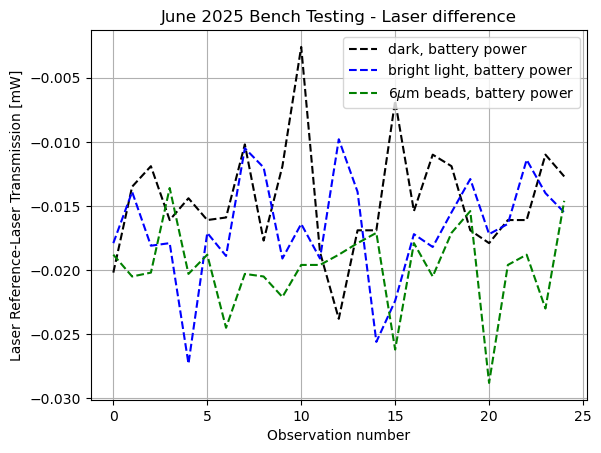

In [75]:
# pretty compelling and odd that the difference is near constant and negative
fig1, ax1 = plt.subplots()
laser_diff_1b[0:25].plot(ls="--", color="k",  label="dark, battery power")
laser_diff_2b[0:25].plot(ls="--", color="b", label="bright light, battery power")
laser_diff_3b[0:25].plot(ls="--", color="g", label="6$\mu$m beads, battery power")
plt.grid()
plt.legend()
plt.title("June 2025 Bench Testing - Laser difference")
plt.ylabel("Laser Reference-Laser Transmission [mW]")
plt.xlabel("Observation number")

In [71]:
# let's consider how this looks with 1-minute smoothing
laser_diff_1b_med = laser_diff_1b.rolling(30, closed="both", min_periods=10).median()
laser_diff_2b_med = laser_diff_2b.rolling(30, closed="both", min_periods=10).median()
laser_diff_3b_med = laser_diff_3b.rolling(30, closed="both", min_periods=10).median()

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kylene.cooley\AppData\Local\Temp\ipykernel_25892\2537651936.py:5: SyntaxWarning: invalid escape sequence '\m'
  laser_diff_3b_med[0:800].plot(ls="--", color="g", label="6$\mu$m beads, battery power")


Text(0.5, 0, 'Observation number')

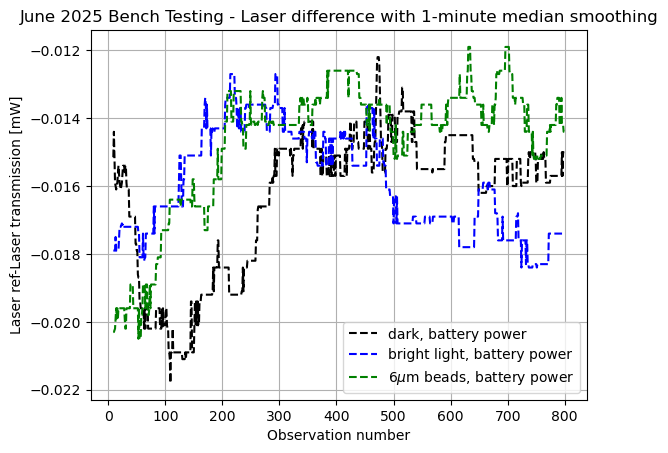

In [76]:
# plot laser diff with smoothing
fig2, ax2 = plt.subplots()
laser_diff_1b_med[0:800].plot(ls="--", color="k",  label="dark, battery power")
laser_diff_2b_med[0:800].plot(ls="--", color="b", label="bright light, battery power")
laser_diff_3b_med[0:800].plot(ls="--", color="g", label="6$\mu$m beads, battery power")
plt.grid()
plt.legend()
plt.title("June 2025 Bench Testing - Laser difference with 1-minute median smoothing")
plt.ylabel("Laser ref-Laser transmission [mW]")
plt.xlabel("Observation number")